# Treating Missingness and Imbalance

In this document we explain the problems of imbalance and missingness in the context of tree-based methods.

**Table of Contents**
- [1. Introduction](#1-introduction)
    - [1.1. Requirements](#11-requirements)
- [2. About Missing Data](#2-about-missing-data)
- [3. About Imbalanced Data](#3-about-imbalanced-data)
- [4. Upcoming Content](#4-upcoming-content)


## 1.1 Requirements
To start, we load the requirements and the data.

In [1]:
######## REQUIREMENTS #################
### PLEASE RUN THIS CELL FIRST ########
#######################################

import subprocess
import sys

# List of required packages
required_packages = ['pandas', 'matplotlib']

# Function to check and install packages
def install(package):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

# Check and install required packages
for package in required_packages:
    try:
        __import__(package)
        print(f"'{package}' is already installed.")
    except ImportError:
        print(f"'{package}' not found. Installing...")
        install(package)

print("\nAll required packages are checked/installed.")

'pandas' is already installed.
'matplotlib' is already installed.

All required packages are checked/installed.


In [2]:
### LIBRARY IMPORTS #####
#########################

import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib for creating visualizations

We showcase the problems of missing values and imbalanced data in this dataset.

Unique values in 'workclass':
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in 'occupation':
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Tech-support' nan 'Protective-serv'
 'Machine-op-inspct' 'Priv-house-serv' 'Armed-Forces']

Unique values in 'native-country':
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'El-Salvador' 'Poland' 'France' 'Dominican-Republic'
 'Honduras' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Trinadad&Tobago' 'Nicaragua' 'Greece'
 'Hong' 'Vietnam' 'Ireland' 'Scotland' 'Hungary' 'Holand-Netherlands']
Number of missing values: 2799


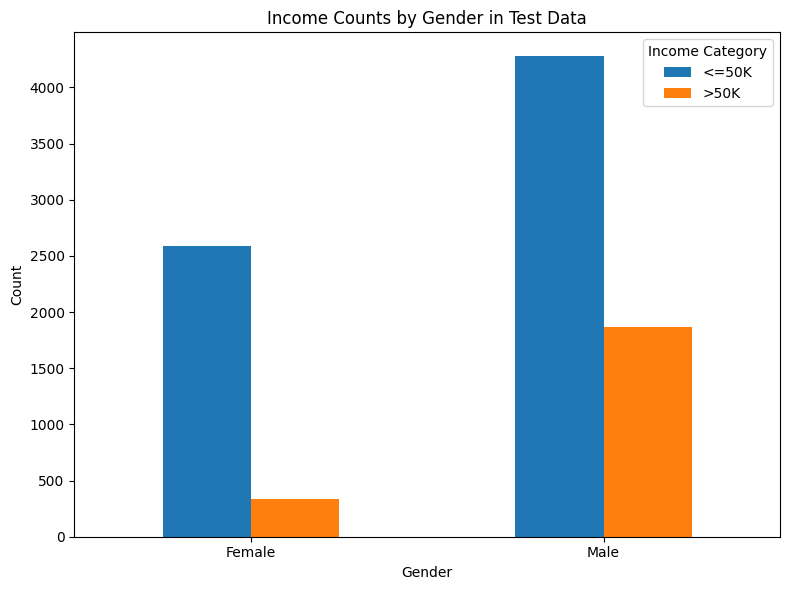

In [3]:
# Load the saved datasets from the CSV files
X_train = pd.read_csv("../data/X_train.csv", index_col=0)  # Use the first column as index
y_train = pd.read_csv("../data/y_train.csv", index_col=0)  # Use the first column as index
X_test = pd.read_csv("../data/X_test.csv", index_col=0)    # Use the first column as index
y_test = pd.read_csv("../data/y_test.csv", index_col=0)    # Use the first column as index

# Check the unique values in the columns with missing data
print("Unique values in 'workclass':\n", X_train['workclass'].unique())
print("\nUnique values in 'occupation':\n", X_train['occupation'].unique())
print("\nUnique values in 'native-country':\n", X_train['native-country'].unique())

# Count the number of NaN values
nan_count = X_train['workclass'].isna().sum()

# Output the results
print(f"Number of missing values: {nan_count}")

# Merge X_test and y_test to have gender and income in the same DataFrame
test_df = X_test.copy()
test_df['Income'] = y_test

# Group by 'sex' and 'Income' to get the counts of income categories by gender
income_gender_counts = test_df.groupby(['sex', 'Income']).size().unstack(fill_value=0)

# Plot a bar plot of income counts by gender
income_gender_counts.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Income Counts by Gender in Test Data')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Income Category')

# Show the plot
plt.tight_layout()
plt.show()

The output of the code shows that there are about 3000 records with missing values and there is an imbalance in the income. This imbalance is different according to gender.

We look to treat these issues. We will give some brief general information about missing data and imbalanced data.

# 2. About Missing Data

Little and Rubin give the following three types of missingness in [Chapter 3.1, 1].

- Missing completely at random (MCAR): Missingness is independent of any observed or unobserved variables. One example is when we cannot collect data on a patient in a hospital because a measuring instrument is accidentally broken. Some data would then be missing, and this would be independent of the observed or unobserved characteristics of the patient.  

- Missing at random (MAR): Missingness depends on the observed data but not on the missing data.  Vateekul gives an example in [2]: `respondents with lower education may be less likely to complete the entire survey'. The cause of missingness is not due to the missing variable, but due to some other variables.

- Non-ignorable missingness: This is missing data that is neither MAR nor MCAR. In other words, the value of a missing variable is related to the reason of its missingness. For example, some people may wish to not report their income in a survey due to their income itself.
\end{enumerate}

From our EDA, we concluded that the missingness was not MCAR, and is likely related to the income. To contend with the missing data, we will use the following strategies:
- Surrogate splits
- Treating missingness as its own category
- Imputation.

We will explain these strategies as we proceed through the next sections.

# 3. About Imbalanced Data

When data is imbalanced, accuracy can become a misleading measure of performance, since predicting everything as the majority class can give good accuracy. We will look at metrics of performance that can be used with imbalanced data and look at a method called SMOTE to try to tackle imbalance.

We will apply and explain SMOTE as we apply it in the next sections. 

# 4. Upcoming

In the next section, we explore the methods of dealing with missingness and imbalance. We will look at classification trees for computational ease. 

# 5. References

[1] Little, Roderick JA, and Donald B. Rubin. Statistical analysis with missing data. Vol. 793. John Wiley & Sons, 2019.

[2] Vateekul, Peerapon, and Kanoksri Sarinnapakorn. "Tree-based approach to missing data imputation." 2009 IEEE International Conference on Data Mining Workshops. IEEE, 2009.